## Medium optimization 

### Import the required libraries and the model.

In [97]:
from cobra.io import read_sbml_model
from cobra import Model, Reaction, Metabolite
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline


model = read_sbml_model('2018_ATCC1015_GSM_iJB1325.xml') #The model is refered from (Brandl, J., Aguilar-Pontes, M. V., Schape, P., Norregaard, A., Arvas, M., Ram, A. F. J., Meyer, V., Tsang, A., de Vries, R. P., & Andersen, M. R. (2018). A community-driven reconstruction of the Aspergillus niger metabolic network. Fungal Biology and Biotechnology, 5, 16. )

C:\Users\boysa\AppData\Local\Temp\ipykernel_22676\2865061136.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
'' is not a valid SBML 'SId'.


#### Introduce boundary conditiones

In [98]:
#Add extracellular metanolites
PNTOe = Metabolite('PNTOe', formula='C9H17NO5', name='(R)-Pantothenate', compartment='e') 
model.add_metabolites([PNTOe])

DHFe = Metabolite('DHFe', formula='C19H21N7O6', name='7,8-Dihydrofolate', compartment='e') 
model.add_metabolites([DHFe])

PABAe = Metabolite('PABAe', formula='C7H7NO2', name='4-Aminobenzoate', compartment='e') 
model.add_metabolites([PABAe])

PLe = Metabolite('PLe', formula='C8H9NO3', name='Pyridoxal', compartment='e') 
model.add_metabolites([PLe])

RIBOFLAVe = Metabolite('RIBOFLAVe', formula='C17H20N4O6', name='Riboflavin', compartment='e') 
model.add_metabolites([RIBOFLAVe])

#Add transport reactions
r2392 = Reaction('r2392')
r2392.name = '(R)-Pantothenate transport'
r2392.subsystem = "Transport"
r2392.lower_bound = -1000
r2392.add_metabolites({PNTOe: -1.0, model.metabolites.PNTO: 1.0})

r2393 = Reaction('r2393')
r2393.name = '7,8-Dihydrofolate transport'
r2393.lower_bound = -1000
r2393.subsystem = 'Transport'
r2393.add_metabolites({DHFe: -1.0, model.metabolites.DHF: 1.0})

r2394 = Reaction('r2394')
r2394.name = '4-Aminobenzoate transport'
r2394.lower_bound = -1000
r2394.subsystem = 'Transport'
r2394.add_metabolites({PABAe: -1.0, model.metabolites.PABA: 1.0})

r2395 = Reaction('r2395')
r2395.name = 'Pyridoxal transport'
r2395.lower_bound = -1000
r2395.subsystem = 'Transport'
r2395.add_metabolites({PLe: -1.0, model.metabolites.PL: 1.0})

r2396 = Reaction('r2396')
r2396.name = 'Riboflavin transport'
r2396.lower_bound = -1000
r2396.subsystem = 'Transport'
r2396.add_metabolites({RIBOFLAVe: -1.0, model.metabolites.RIBOFLAV: 1.0})

r2397 = Reaction('r2397')
r2397.name = 'Copper transport'
r2397.lower_bound = -1000
r2397.subsystem = 'Transport'
r2397.add_metabolites({model.metabolites.CUe: -1.0, model.metabolites.CU: 1.0})

#Add boundary conditions
model.add_boundary(model.metabolites.PNTOe, type="exchange", reaction_id= "BOUNDARY_PNTOe")
model.add_boundary(model.metabolites.DHFe, type="exchange", reaction_id= "BOUNDARY_DHFe")
model.add_boundary(model.metabolites.PABAe, type="exchange", reaction_id= "BOUNDARY_PABAe")
model.add_boundary(model.metabolites.PLe, type="exchange", reaction_id= "BOUNDARY_PLe")
model.add_boundary(model.metabolites.RIBOFLAVe, type="exchange", reaction_id= "BOUNDARY_RIBOFLAVe")
model.add_boundary(model.metabolites.CUe, type="exchange", reaction_id= "BOUNDARY_CUe")

Reaction identifier,BOUNDARY_CUe
Name,Copper exchange
Memory address,0x1ed08e18e50
Stoichiometry,CUe <=> Copper <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


#### Formulating the YES media (Control): 
The undefined composition of yeast extract in Yeast-Extract with Supplments (YES) media was assumed to be that of YNB media plus 20 amino acids and d-glucose (Suthers et al., 2020). 

In [99]:
medium_blank = {key: 0 for key in model.medium}
YESmedium = medium_blank # Setup the object for YESmedium

#Set the concentration for the amino acids
YESmedium['BOUNDARY_GLCe'] = 20 
YESmedium['BOUNDARY_ALAe'] = 10
YESmedium['BOUNDARY_ARGe'] = 10
YESmedium['BOUNDARY_ASPe'] = 10
YESmedium['BOUNDARY_CYSe'] = 10
YESmedium['BOUNDARY_GLUe'] = 10
YESmedium['BOUNDARY_GLYe'] = 10
YESmedium['BOUNDARY_HISe'] = 10
YESmedium['BOUNDARY_ILEe'] = 10
YESmedium['BOUNDARY_LEUe'] = 10
YESmedium['BOUNDARY_LYSe'] = 10
YESmedium['BOUNDARY_METe'] = 10
YESmedium['BOUNDARY_PHEe'] = 10
YESmedium['BOUNDARY_PROe'] = 10
YESmedium['BOUNDARY_SERe'] = 10
YESmedium['BOUNDARY_THRe'] = 10
YESmedium['BOUNDARY_TRPe'] = 10
YESmedium['BOUNDARY_TYRe'] = 10
YESmedium['BOUNDARY_VALe'] = 10

#Set the condition
YESmedium['BOUNDARY_H2Oe'] = 1000 #Water
YESmedium['BOUNDARY_O2e'] = 1000 #Oxygen 

#Set the concentration for the supplements
YESmedium['BOUNDARY_NH4e'] = 5 #Ammonium  
YESmedium['BOUNDARY_SLFe'] = 5.5 #Sulfate
YESmedium['BOUNDARY_BTe'] = 2/10**6 #Biotin 
YESmedium['BOUNDARY_PNTOe'] = 400/10**6 #Pantothenic Acid
YESmedium['BOUNDARY_DHFe'] = 2/10**6 #Folic acid
YESmedium['BOUNDARY_MYOIe'] = 4000/10**6 #myo-Inositol
YESmedium['BOUNDARY_NICAe'] = 800/10**6 #Nicotinate
YESmedium['BOUNDARY_PABAe'] = 400/10**6 #4-Aminobenzoate
YESmedium['BOUNDARY_PLe'] = 800/10**6 #Pyridoxal
YESmedium['BOUNDARY_RIBOFLAVe'] = 200/10**6 #Riboflavin
YESmedium['BOUNDARY_THIAe'] = 800/10**6 #Thiamine
YESmedium['BOUNDARY_CUe'] = 80/10**6 #Copper
YESmedium['BOUNDARY_Ke'] = 2 #Potassium
YESmedium['BOUNDARY_FE2e'] = 200/10**6 #Ferric 
YESmedium['BOUNDARY_MNe'] = 400/10**6 #Manganese
YESmedium['BOUNDARY_MOe'] = 200/10**6 #Molybdate
YESmedium['BOUNDARY_ZNe'] = 400/10**6 #Zinc
YESmedium['BOUNDARY_PIe'] = 1 #Phosphate
YESmedium['BOUNDARY_CAe'] = 0.4 #Calcium 

# Setting YES as control medium
model.medium = YESmedium

# model.reactions.BOUNDARY_GLCe.bonds = -20,1000
# model.reactions.BOUNDARY_ALAe.bonds = -10,1000
# model.reactions.BOUNDARY_ARGe.bonds = -10,1000
# model.reactions.BOUNDARY_ASPe.bonds = -10,1000
# model.reactions.BOUNDARY_CYSe.bonds = -10,1000
# model.reactions.BOUNDARY_GLUe.bonds = -10,1000
# model.reactions.BOUNDARY_GLYe.bonds = -10,1000
# model.reactions.BOUNDARY_HISe.bonds = -10,1000
# model.reactions.BOUNDARY_ILEe.bonds = -10,1000
# model.reactions.BOUNDARY_LEUe.bonds = -10,1000
# model.reactions.BOUNDARY_LYSe.bonds = -10,1000
# model.reactions.BOUNDARY_METe.bonds = -10,1000
# model.reactions.BOUNDARY_PHEe.bonds = -10,1000
# model.reactions.BOUNDARY_PROe.bonds = -10,1000
# model.reactions.BOUNDARY_PHEe.bonds = -10,1000
# model.reactions.BOUNDARY_SERe.bonds = -10,1000
# model.reactions.BOUNDARY_THRe.bonds = -10,1000
# model.reactions.BOUNDARY_TRPe.bonds = -10,1000
# model.reactions.BOUNDARY_TYRe.bonds = -10,1000
# model.reactions.BOUNDARY_VALe.bonds = -10,1000

#### Productivities using control medium (YES media):

In [100]:
with model:
    solution = model.optimize()
    print('Maximum theoretical biomass productivity:', solution.fluxes['DRAIN_Biomass'], '/h')
    
    model.objective = model.reactions.r1976
    yanD_production = model.optimize().objective_value
    print('Maximum theoretical productivity of yanuthone D syshtesis:', yanD_production, 'mmol/gDW*h')

Maximum theoretical biomass productivity: 11.889156928341682 /h
Maximum theoretical productivity of yanuthone D syshtesis: 23.708397214783307 mmol/gDW*h


### C-sourse optimization
#### Productivities using the alternative carbon source:

In [101]:
#Fructose
medium = model.medium
with model:
    medium['BOUNDARY_GLCe'] = 0
    medium['BOUNDARY_FRUe'] = 20
    model.medium = medium_blank
    solution2 = model.optimize()
    print('Maximum theoretical biomass productivity:', solution2.fluxes['DRAIN_Biomass'], '/h')
    
    model.medium = medium_blank
    model.reactions.BOUNDARY_FRUe.bounds = (0,1000)
    model.objective = model.reactions.r1976
    yanD_production2 = model.optimize().objective_value
    print('Maximum theoretical productivity of yanuthone D syshtesis:', yanD_production2, 'mmol/gDW*h')
    


Maximum theoretical biomass productivity: 11.88915692836596 /h
Maximum theoretical productivity of yanuthone D syshtesis: 23.70839721478311 mmol/gDW*h


In [102]:
#Sucorse
medium = model.medium
with model:
    medium['BOUNDARY_GLCe'] = 0
    medium['BOUNDARY_SUCe'] = 20/2 #disaccharide
    model.medium = medium
    solution3 = model.optimize()
    print('Maximum theoretical biomass productivity:', solution3.fluxes['DRAIN_Biomass'], '/h')
    
    model.medium = medium
    model.objective = model.reactions.r1976
    yanD_production3 = model.optimize().objective_value
    print('Maximum theoretical productivity of yanuthone D syshtesis:', yanD_production3, 'mmol/gDW*h')

Maximum theoretical biomass productivity: 11.889156928291131 /h
Maximum theoretical productivity of yanuthone D syshtesis: 23.708397214782792 mmol/gDW*h


In [103]:
#Maltose
medium = model.medium
with model:
    medium['BOUNDARY_GLCe'] = 0
    medium['BOUNDARY_MLTe'] = 20/2 #disaccharide
    model.medium = medium
    solution4 = model.optimize()
    print('Maximum theoretical biomass productivity:', solution4.fluxes['DRAIN_Biomass'], '/h')
  
    model.medium = medium
    model.objective = model.reactions.r1976
    yanD_production4 = model.optimize().objective_value
    print('Maximum theoretical productivity of yanuthone D syshtesis:', yanD_production4, 'mmol/gDW*h')

Maximum theoretical biomass productivity: 11.889156928367274 /h
Maximum theoretical productivity of yanuthone D syshtesis: 23.708397214783172 mmol/gDW*h


In [104]:
#Xylose
medium = model.medium
with model:
    medium['BOUNDARY_GLCe'] = 0
    medium['BOUNDARY_XYLe'] = 20
    model.medium = medium
    solution5 = model.optimize()
    print('Maximum theoretical biomass productivity:', solution5.fluxes['DRAIN_Biomass'], '/h')
    
    model.medium = medium
    model.objective = model.reactions.r1976
    yanD_production5 = model.optimize().objective_value
    print('Maximum theoretical productivity of yanuthone D syshtesis:', yanD_production5, 'mmol/gDW*h')

Maximum theoretical biomass productivity: 11.699330010969016 /h
Maximum theoretical productivity of yanuthone D syshtesis: 23.176795715051295 mmol/gDW*h


In [105]:
#Mannitol
medium = model.medium
with model:
    medium['BOUNDARY_GLCe'] = 0
    medium['BOUNDARY_MNTe'] = 20
    model.medium = medium
    solution6 = model.optimize()
    print('Maximum theoretical biomass productivity:', solution6.fluxes['DRAIN_Biomass'], '/h')
    
    model.medium = medium
    model.objective = model.reactions.r1976
    yanD_production6 = model.optimize().objective_value
    print('Maximum theoretical productivity of yanuthone D syshtesis:', yanD_production6, 'mmol/gDW*h')

Maximum theoretical biomass productivity: 11.960879944959489 /h
Maximum theoretical productivity of yanuthone D syshtesis: 23.909254204604828 mmol/gDW*h


In [106]:
#Sorbitol
medium = model.medium
with model:
    medium['BOUNDARY_GLCe'] = 0
    medium['BOUNDARY_SORe'] = 20
    model.medium = medium
    solution7 = model.optimize()
    print('Maximum theoretical biomass productivity:', solution7.fluxes['DRAIN_Biomass'], '/h') 
    
    model.medium = medium
    model.objective = model.reactions.r1976
    yanD_production7 = model.optimize().objective_value
    print('Maximum theoretical productivity of yanuthone D syshtesis:', yanD_production7, 'mmol/gDW*h')

Maximum theoretical biomass productivity: 11.889156926901906 /h
Maximum theoretical productivity of yanuthone D syshtesis: 23.708397214783044 mmol/gDW*h


In [107]:
#Acetate
medium = model.medium
with model:
    medium['BOUNDARY_GLCe'] = 0
    medium['BOUNDARY_ACe'] = 60
 

    model.medium = medium
    solution8 = model.optimize()
    print('Maximum theoretical biomass productivity:', solution8.fluxes['DRAIN_Biomass'], '/h')
    
    model.medium = medium
    model.objective = model.reactions.r1976
    yanD_production8 = model.optimize().objective_value
    print('Maximum theoretical productivity of yanuthone D syshtesis:', yanD_production8, 'mmol/gDW*h')

Maximum theoretical biomass productivity: 11.819158274168265 /h
Maximum theoretical productivity of yanuthone D syshtesis: 23.513565934654245 mmol/gDW*h


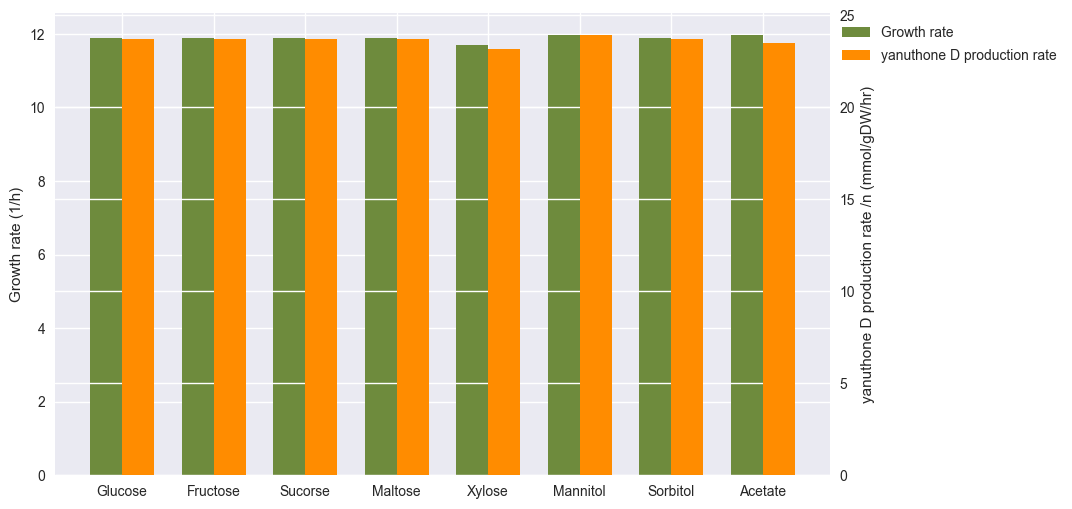

In [108]:
# Data for two categories
biomass_values = [solution.fluxes['DRAIN_Biomass'],
                   solution2.fluxes['DRAIN_Biomass'],
                   solution3.fluxes['DRAIN_Biomass'],
                   solution4.fluxes['DRAIN_Biomass'],
                   solution5.fluxes['DRAIN_Biomass'],
                   solution6.fluxes['DRAIN_Biomass'],
                   solution7.fluxes['DRAIN_Biomass'],
                   solution6.fluxes['DRAIN_Biomass']]

yanD_values = [yanD_production,
               yanD_production2,
               yanD_production3,
               yanD_production4,
               yanD_production5,
               yanD_production6,
               yanD_production7,
               yanD_production8]

# Seting number of plots 
x_values = np.arange(len(biomass_values))

# Width of the bars
bar_width = 0.35


# Set the figure size
fig, ax1 = plt.subplots(figsize=(10, 6))  

# Plotting the data
# Plotting the data on the first y-axis
ax1.bar(x_values - bar_width/2, biomass_values, bar_width, label='Growth rate', color='#6E8B3D')
ax1.set_ylabel('Growth rate (1/h)')


plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Create a second y-axis and plot the second set of data on it
ax2 = ax1.twinx()
ax2.bar(x_values + bar_width/2, yanD_values, bar_width, label='yanuthone D production rate', color='#FF8C00')
ax2.set_ylabel('yanuthone D production rate /n (mmol/gDW/hr)')

x_labels = ["Glucose", "Fructose", "Sucorse", "Maltose", "Xylose", "Mannitol", "Sorbitol", "Acetate"]

# Adding labels and title
# plt.title('C-source optimization', fontsize=18)

# Display the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.95))

plt.xticks(np.arange(8), labels = x_labels)

# Show the plot
plt.show()


### Potential supplements for enhancing yanuthoneD production 

#### Renew the default of medium composition (YES media)

In [109]:
model.medium = YESmedium

In [110]:
#Malate as precursor for yanuthoneD production 
medium = model.medium
with model:
    medium['BOUNDARY_MALe'] = 1000/4 #Devided by the C-atom

    model.medium = medium
    solution = model.optimize()
    print('Maximum theoretical biomass productivity:', solution.fluxes['DRAIN_Biomass'], '/h')
    
    model.medium = medium
    model.objective = model.reactions.r1976
    yanD_production = model.optimize().objective_value
    print('Maximum theoretical productivity of yanuthone D syshtesis:', yanD_production, 'mmol/gDW*h')

Maximum theoretical biomass productivity: 15.37668318269276 /h
Maximum theoretical productivity of yanuthone D syshtesis: 43.64345345474033 mmol/gDW*h


In [111]:
#Acetate as precursor for yanuthoneD production 
medium = model.medium
with model:
    medium['BOUNDARY_ACe'] = 1000/2 #Devided by the C-atom

    model.medium = medium
    solution2 = model.optimize()
    print('Maximum theoretical biomass productivity:', solution2.fluxes['DRAIN_Biomass'], '/h')
    
    model.medium = medium
    model.objective = model.reactions.r1976
    yanD_production2 = model.optimize().objective_value
    print('Maximum theoretical productivity of yanuthone D syshtesis:', yanD_production2, 'mmol/gDW*h')

Maximum theoretical biomass productivity: 13.901115261822715 /h
Maximum theoretical productivity of yanuthone D syshtesis: 48.66487820032116 mmol/gDW*h


In [112]:
#Octanate as precursor for yanuthoneD production 
medium = model.medium
with model:
    medium['BOUNDARY_C80e'] = 1000/8 #Devided by the C-atom

    model.medium = medium
    solution3 = model.optimize()
    print('Maximum theoretical biomass productivity:', solution3.fluxes['DRAIN_Biomass'], '/h')
    
    model.medium = medium
    model.objective = model.reactions.r1976
    yanD_production3 = model.optimize().objective_value
    print('Maximum theoretical productivity of yanuthone D syshtesis:', yanD_production3, 'mmol/gDW*h')

Maximum theoretical biomass productivity: 15.302322707018263 /h
Maximum theoretical productivity of yanuthone D syshtesis: 53.39350701660435 mmol/gDW*h


In [113]:
#m-cresol as precursor for yanuthoneD production 
medium = model.medium
with model:
    medium['BOUNDARY_MCREe'] = 1000/7 #Devided by the C-atom

    model.medium = medium
    solution4 = model.optimize()
    print('Maximum theoretical biomass productivity:', solution4.fluxes['DRAIN_Biomass'], '/h')
    
    model.medium = medium
    model.objective = model.reactions.r1976
    yanD_production4 = model.optimize().objective_value
    print('Maximum theoretical productivity of yanuthone D syshtesis:', yanD_production4, 'mmol/gDW*h')

Maximum theoretical biomass productivity: 15.587478599955544 /h
Maximum theoretical productivity of yanuthone D syshtesis: 44.437835497835906 mmol/gDW*h


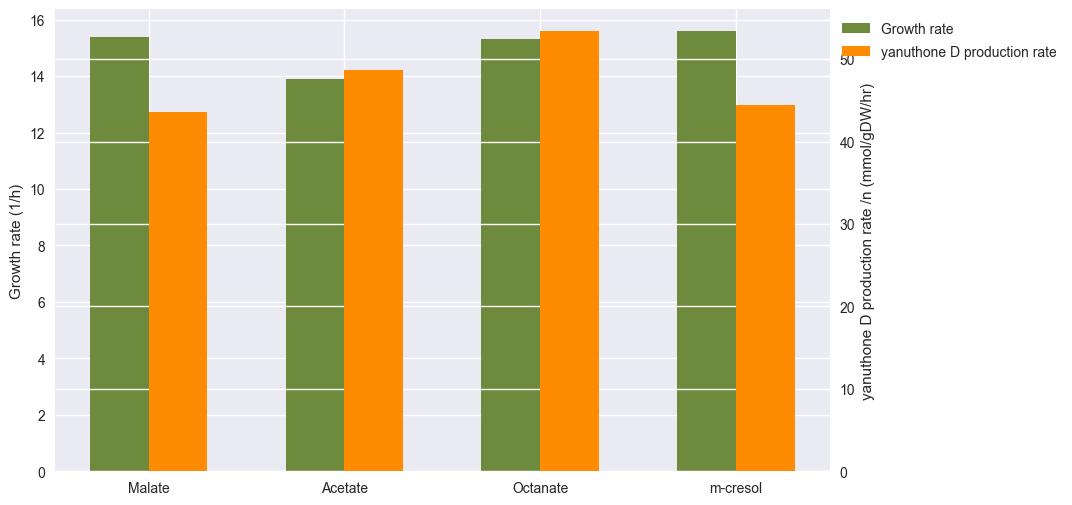

In [115]:
# Data for two categories
biomass_values = [solution.fluxes['DRAIN_Biomass'],
                   solution2.fluxes['DRAIN_Biomass'],
                   solution3.fluxes['DRAIN_Biomass'],
                   solution4.fluxes['DRAIN_Biomass']]

yanD_values = [yanD_production,
               yanD_production2,
               yanD_production3,
               yanD_production4]

# Seting number of plots 
x_values = np.arange(len(biomass_values))

# Width of the bars
bar_width = 0.3


# Set the figure size
fig, ax1 = plt.subplots(figsize=(10, 6))  

# Plotting the data
# Plotting the data on the first y-axis
ax1.bar(x_values - bar_width/2, biomass_values, bar_width, label='Growth rate', color='#6E8B3D')
ax1.set_ylabel('Growth rate (1/h)')


plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Create a second y-axis and plot the second set of data on it
ax2 = ax1.twinx()
ax2.bar(x_values + bar_width/2, yanD_values, bar_width, label='yanuthone D production rate', color='#FF8C00')
ax2.set_ylabel('yanuthone D production rate /n (mmol/gDW/hr)')

x_labels = ["Malate", "Acetate", "Octanate", "m-cresol"]

# Display the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.95))

plt.xticks(np.arange(4), labels = x_labels)

# Show the plot
plt.show()
